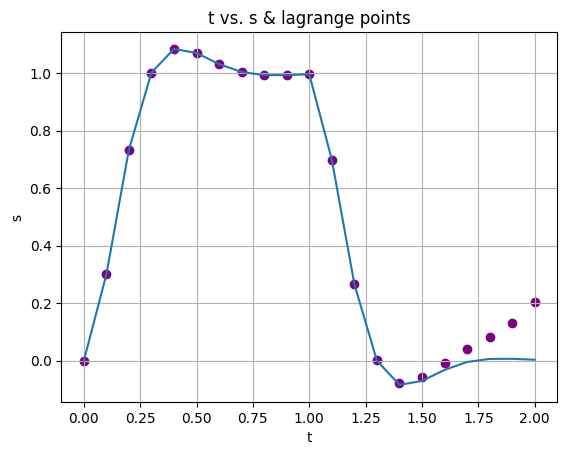

      t       s
0   0.0  0.0000
1   0.1  0.3000
2   0.2  0.7340
3   0.3  1.0020
4   0.4  1.0844
5   0.5  1.0701
6   0.6  1.0316
7   0.7  1.0041
8   0.8  0.9934
9   0.9  0.9932
10  1.0  0.9964
11  1.1  0.6992
12  1.2  0.2664
13  1.3  0.0004
14  1.4 -0.0840
15  1.5 -0.0700
16  1.6 -0.0317
17  1.7 -0.0042
18  1.8  0.0065
19  1.9  0.0068
20  2.0  0.0036
Lagrange Estimation of t = 1.45: -0.06580970851100573 

Cubic Spline Estimate of t = 1.45 -0.08600000026 



<ipython-input-63-7b571644d4d2>:44: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[i] = (b[i] - k) / (A[i, i])


In [63]:
#Kody Chabaud
#Mathematical Modeling
#Dr. Kuhn
#Due: 3/20/24
#Homework 6
import pandas as pd
import numpy as np
from scipy.interpolate import lagrange as lg
import matplotlib.pyplot as plt

#Part 1
hello = pd.read_excel("data.xlsx") #file is on colab's runtime so must be reput there each time
x = hello['t'] #x value of data
y = hello['s'] #y value of data
#Plotting data points
plt.plot(x, y)
plt.grid()
plt.xlabel("t")
plt.ylabel("s")
plt.title("t vs. s & lagrange points")
#Performing scipy version of lagrange of x,y
z = lg(x,y)
plt.scatter(x,z(x), color = "purple") #Plotting x and lagrange of x approximations over original graph
#plt.plot(x,z) #<- fun fact this makes a really nice looking graph
plt.show()
#print(z(x)) <- values are approximately y
print(hello)
#Part 2: Creating cubic spline interpolation


def jacobian(A, b, x0, tol, n_its = 500):
    n = A.shape[0]
    x = x0.copy()
    x_prev = x0.copy()
    counter = 0
    x_diff = tol + 1

    while (x_diff > tol) and (counter < n_its):
        for i in range(0, n):
            k = 0
            for j in range(0, n):
                if i != j:
                    k += A[i, j] * x_prev[j]
            x[i] = (b[i] - k) / (A[i, i])
        counter += 1
        x_diff = np.linalg.norm(x - x_prev)
        x_prev = x.copy()  #Update x_prev for the next iteration

    return x


def cubic_spline(x, y, tol = 1e-50):
  x = np.array(x)
  y = np.array(y)

  if np.any(np.diff(x)<0):
    idx = np.argsort(x)
    x = x[idx]
    y = y[idx]

  length = len(x)
  diff_x = np.diff(x)
  diff_y = np.diff(y)

  #Getting matrix A
  A = np.zeros(shape = (length, length))
  b = np.zeros(shape = (length, 1))
  A[0,0] = 1
  A[-1,-1] = 1

  for i in range(1, length-1):
    A[i, i-1] = diff_x[i-1]
    A[i,i+1] = diff_x[i]
    A[i,i] = 2*(diff_x[i-1]+diff_x[i])
    #Getting matrix b:
    b[i,0] = 3*(diff_y[i]/diff_x[i] - diff_y[i-1]/diff_x[i-1])

  #Getting c in Ac=b
  c = jacobian(A,b,np.zeros(len(A)), tol = tol, n_its = 500)

  #getting d and b
  d = np.zeros(shape = (length-1, 1))
  b = np.zeros(shape = (length-1, 1))
  for i in range(0,len(d)):
    d[i] = (c[i+1]-c[i])/(3*diff_x[i])
    b[i] = (diff_y[i]/diff_x[i]) - (diff_x[i]/3)*(2*c[i]+c[i+1])

  return b, c, d

cubic_spline(x,y)



def cubic_approx_15(x):
  for i in range(0, 21):
    diff = .1
    return .4 + -0.20893239 * (diff) + 4.82911759 * (diff)**2 + -13.39793716 * (diff)**3

#Don't have time to plot cubic spline on data set but creates a relatively decent approximation for the set of points. Just need to get functions for each different A, b, c, and d
diff = .1
#Part 3
print("Lagrange Estimation of t = 1.45:" , z(1.45), "\n")
print("Cubic Spline Estimate of t = 1.45", -.1 + -0.20893239 * (diff) + 4.82911759 * (diff)**2 + -13.39793716 * (diff)**3, "\n")